# Import the necessary python packages

In [57]:
import numpy as np
import pickle
from tensorflow.keras import Sequential, optimizers, layers
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report as cr

# Load preprocessed Kaggle data

In [2]:
file_train = open("Data/train_dataset.pickle","rb")
trainingdata = pickle.load(file_train)
train_data, train_label = trainingdata["data"], trainingdata["label"]
train_data = np.asarray(train_data)

file_validation = open("Data/valid_dataset.pickle","rb")
validationdata = pickle.load(file_validation)
valid_data, valid_label = validationdata["data"], validationdata["label"]
valid_data = np.asarray(valid_data)

file_test = open("Data/test_dataset.pickle","rb")
testdata = pickle.load(file_test)
test_data, test_label = testdata["data"], testdata["label"]
test_data = np.asarray(test_data)

In [3]:
for idx, val in enumerate(train_label):
    if val == "male":
        train_label[idx] = 0
    else:
        train_label[idx] = 1
        
for idx, val in enumerate(test_label):
    if val == "male":
        test_label[idx] = 0
    else:
        test_label[idx] = 1
        
for idx, val in enumerate(valid_label):
    if val == "male":
        valid_label[idx] = 0
    else:
        valid_label[idx] = 1
        
train_label = train_label.astype(np.float32)
test_label = test_label.astype(np.float32)
valid_label = valid_label.astype(np.float32)

# Create a the baseline CNN model

In [4]:
# create a sequential model
model = Sequential()

# add layers
model.add(layers.Conv2D(16, (3,3), activation="relu", input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8464)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                541760    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [6]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(train_data, train_label, validation_data=(valid_data, valid_label),
                    epochs=50, use_multiprocessing=True)

Epoch 1/50
348/348 [==============================] - 30s 84ms/step - loss: 3.9459 - acc: 0.7087 - val_loss: 0.5588 - val_acc: 0.7232
Epoch 2/50
348/348 [==============================] - 28s 80ms/step - loss: 0.4230 - acc: 0.8182 - val_loss: 0.3417 - val_acc: 0.8655
Epoch 3/50
348/348 [==============================] - 28s 81ms/step - loss: 0.3615 - acc: 0.8540 - val_loss: 0.3443 - val_acc: 0.8491
Epoch 4/50
348/348 [==============================] - 28s 80ms/step - loss: 0.3033 - acc: 0.8806 - val_loss: 0.3281 - val_acc: 0.8765
Epoch 5/50
348/348 [==============================] - 28s 81ms/step - loss: 0.2851 - acc: 0.8860 - val_loss: 0.3366 - val_acc: 0.8710
Epoch 6/50
348/348 [==============================] - 28s 81ms/step - loss: 0.2656 - acc: 0.9001 - val_loss: 0.3269 - val_acc: 0.8726
Epoch 7/50
348/348 [==============================] - 29s 82ms/step - loss: 0.2414 - acc: 0.9085 - val_loss: 0.3895 - val_acc: 0.8538
Epoch 8/50
348/348 [==============================] - 27s 78ms

# Plot accuracy and loss for training and validation

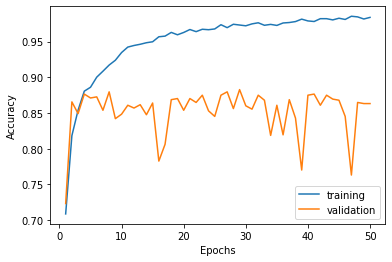

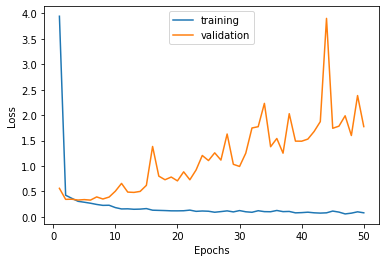

In [7]:
acc_history = history.history["acc"]
val_acc_history = history.history["val_acc"]

plt.plot(range(1, len(acc_history) + 1), acc_history)
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training", "validation"])
plt.show()

loss_history = history.history["loss"]
val_loss_history = history.history["val_loss"]

plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["training", "validation"])
plt.show()

# Plot ROC curve with AUC score for validation and test set

In [8]:
valid_pred = model.predict(valid_data).ravel()
fpr_valid, tpr_valid, threshold_valid = roc_curve(valid_label, valid_pred)
auc_valid = auc(fpr_valid, tpr_valid)

test_pred = model.predict(test_data).ravel()
fpr_test, tpr_test, threshold_test = roc_curve(test_label, test_pred)
auc_test = auc(fpr_test, tpr_test)

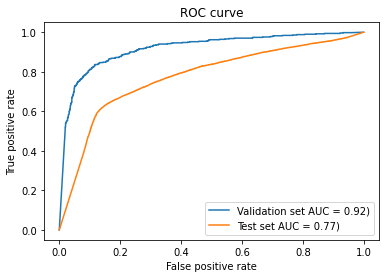

In [9]:
plt.plot(fpr_valid, tpr_valid, label=f"Validation set AUC = {np.round(auc_valid, 2)})")
plt.plot(fpr_test, tpr_test, label=f"Test set AUC = {np.round(auc_test, 2)})")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc=4)
plt.show()

# Create a confusion matrix for validation and test set

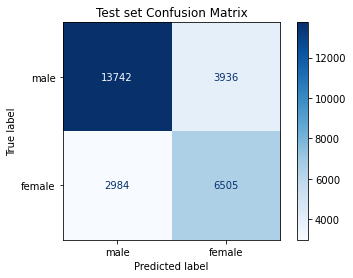

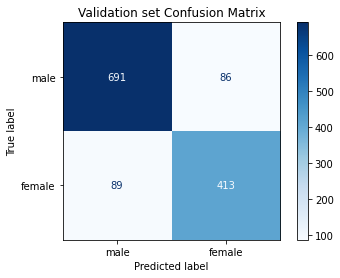

In [10]:
test_matrix = confusion_matrix(test_label, np.round(test_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=test_matrix, display_labels=["male", "female"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Test set Confusion Matrix")
plt.show()

valid_matrix = confusion_matrix(valid_label, np.round(valid_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=valid_matrix, display_labels=["male", "female"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Validation set Confusion Matrix")
plt.show()

# Performance measures (accuracy, sensitivity, specificity, F1-score

In [86]:
train_pred = model.predict(train_data).ravel()
cm_train = confusion_matrix(np.round(train_pred), train_label)
cr_train = cr(np.round(train_pred), train_label, output_dict=True)

print(f"Training set accuracy is {np.round(model.evaluate(train_data, train_label, verbose=0)[1],2)}")
print(f"Training set sensitivity is {np.round(cr_train['weighted avg']['recall'],2)}")
print(f"Training set specificity is {np.round(cm_train[1][1]/(cm_train[1][1]+cm_train[1][0]),2)}")
print(f"Training set F1-score is {np.round(cr_train['accuracy'],2)}")
print("----------------------------------")

valid_pred = model.predict(valid_data).ravel()
cm_valid = confusion_matrix(np.round(valid_pred), valid_label)
cr_valid = cr(np.round(valid_pred), valid_label, output_dict=True)

print(f"Validation set accuracy is {np.round(model.evaluate(valid_data, valid_label, verbose=0)[1],2)}")
print(f"Validation set sensitivity is {np.round(cr_valid['weighted avg']['recall'],2)}")
print(f"Validation set specificity is {np.round(cm_valid[1][1]/(cm_valid[1][1]+cm_valid[1][0]),2)}")
print(f"Validation set F1-score is {np.round(cr_valid['accuracy'],2)}")
print("----------------------------------")

test_pred = model.predict(test_data).ravel()
cm_test = confusion_matrix(np.round(test_pred), test_label)
cr_test = cr(np.round(test_pred), test_label, output_dict=True)

print(f"Test set accuracy is {np.round(model.evaluate(test_data, test_label, verbose=0)[1],2)}")
print(f"Test set sensitivity is {np.round(cr_test['weighted avg']['recall'],2)}")
print(f"Test set specificity is {np.round(cm_test[1][1]/(cm_test[1][1]+cm_test[1][0]),2)}")
print(f"Test set F1-score is {np.round(cr_test['accuracy'],2)}")


Training set accuracy is 0.99
Training set sensitivity is 0.99
Training set specificity is 0.99
Training set F1-score is 0.99
----------------------------------
Validation set accuracy is 0.86
Validation set sensitivity is 0.86
Validation set specificity is 0.83
Validation set F1-score is 0.86
----------------------------------
Test set accuracy is 0.75
Test set sensitivity is 0.75
Test set specificity is 0.62
Test set F1-score is 0.75
